In [121]:
import matplotlib.pyplot as plt

# value_size를 숫자(KB 단위)로 변환
def parse_size(size_str):
    return int(size_str.replace('KB', ''))

def plot_graph(df1, df2, col, workload, compare="universal"):
    df1 = df1.copy()
    df2 = df2.copy()
    
    df1["value_size_numeric"] = df1["value_size"].apply(parse_size)
    df2["value_size_numeric"] = df2["value_size"].apply(parse_size)

    # 색상 리스트
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

    plt.figure(figsize=(8, 6))

    # 꺾은선 그래프 (df1)
    if col:
        unique_levels = sorted(df1[col].dropna().unique())
        for i, level_base in enumerate(unique_levels):
            subset = df1[df1[col] == level_base].sort_values(by="value_size_numeric")
            if not subset.empty:
                plt.plot(subset["value_size_numeric"], subset["WAF"], marker='o', label=f"{level_base} (line)", color=colors[i % len(colors)])
    else:
        df1_sorted = df1.sort_values(by="value_size_numeric")
        plt.plot(df1_sorted["value_size_numeric"], df1_sorted["WAF"], marker='o', color='tab:blue', label='df1 (line)')

    # 막대 그래프 (df2)
    df2_sorted = df2.sort_values(by="value_size_numeric")
    plt.bar(df2_sorted["value_size_numeric"], df2_sorted["WAF"], width=1.5, alpha=0.5, color='gray', label=compare)

    # 공통 설정
    title = f"WAF from value_size in {workload}" if not col else f"WAF from value_size for different {col} in {workload}"
    plt.title(title)
    plt.xlabel("Value Size (KB)")
    plt.ylabel("WAF")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Leveld log_data

In [85]:
import pandas as pd
# CSV 파일 읽기
leveled = pd.read_csv('modified_h1_leveled_output.csv')
leveled

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
0,overwrite,leveled,1KB,1000000.0,1.056000e+09,5.423216e+08,5.542331e+08,1.056000e+09,1000000.0,2.038404
1,fillrandom,leveled,16KB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,overwrite,leveled,4KB,1000000.0,4.128000e+09,3.402204e+09,2.264465e+09,4.128000e+09,1000000.0,2.372740
3,overwrite,leveled,16KB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fillrandom,leveled,4KB,1000000.0,4.128000e+09,3.392791e+09,2.264426e+09,4.128000e+09,1000000.0,2.370450
5,fillrandom,leveled,1KB,1000000.0,1.056000e+09,5.263365e+08,5.541926e+08,1.056000e+09,1000000.0,2.023228


In [96]:
leveled_overwrite = leveled[leveled['workload'] == 'overwrite']
leveled_overwrite

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
0,overwrite,leveled,1KB,1000000.0,1.056000e+09,5.423216e+08,5.542331e+08,1.056000e+09,1000000.0,2.038404
2,overwrite,leveled,4KB,1000000.0,4.128000e+09,3.402204e+09,2.264465e+09,4.128000e+09,1000000.0,2.372740
3,overwrite,leveled,16KB,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
leveled_fillrandom = leveled[leveled['workload'] == 'fillrandom']
leveled_fillrandom

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
1,fillrandom,leveled,16KB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fillrandom,leveled,4KB,1000000.0,4.128000e+09,3.392791e+09,2.264426e+09,4.128000e+09,1000000.0,2.370450
5,fillrandom,leveled,1KB,1000000.0,1.056000e+09,5.263365e+08,5.541926e+08,1.056000e+09,1000000.0,2.023228


## Universal_log_data

In [72]:
import pandas as pd
# CSV 파일 읽기
universal = pd.read_csv('modified_h1_universal_output.csv')
universal

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
0,overwrite,universal,1KB,1000000,1056000000,589472628,554212973,1056000000,1000000,2.083036
1,fillrandom,universal,4KB,1000000,4128000000,3540818396,2301488797,4128000000,1000000,2.415288
2,overwrite,universal,16KB,1000000,16417000000,20922566009,8996726917,16417000000,1000000,2.822458
3,fillrandom,universal,16KB,1000000,16417000000,23330374011,8996719499,16417000000,1000000,2.969123
4,fillrandom,universal,1KB,1000000,1056000000,590356007,554189559,1056000000,1000000,2.083850
5,overwrite,universal,4KB,1000000,4128000000,3254281401,2263874391,4128000000,1000000,2.336763


In [73]:
universal_overwrite = universal[universal['workload'] == 'overwrite']
universal_overwrite

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
0,overwrite,universal,1KB,1000000,1056000000,589472628,554212973,1056000000,1000000,2.083036
2,overwrite,universal,16KB,1000000,16417000000,20922566009,8996726917,16417000000,1000000,2.822458
5,overwrite,universal,4KB,1000000,4128000000,3254281401,2263874391,4128000000,1000000,2.336763


In [74]:
universal_fillrandom = universal[universal['workload'] == 'fillrandom']
universal_fillrandom

,workload,compaction_style,value_size,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
1,fillrandom,universal,4KB,1000000,4128000000,3540818396,2301488797,4128000000,1000000,2.415288
3,fillrandom,universal,16KB,1000000,16417000000,23330374011,8996719499,16417000000,1000000,2.969123
4,fillrandom,universal,1KB,1000000,1056000000,590356007,554189559,1056000000,1000000,2.083850


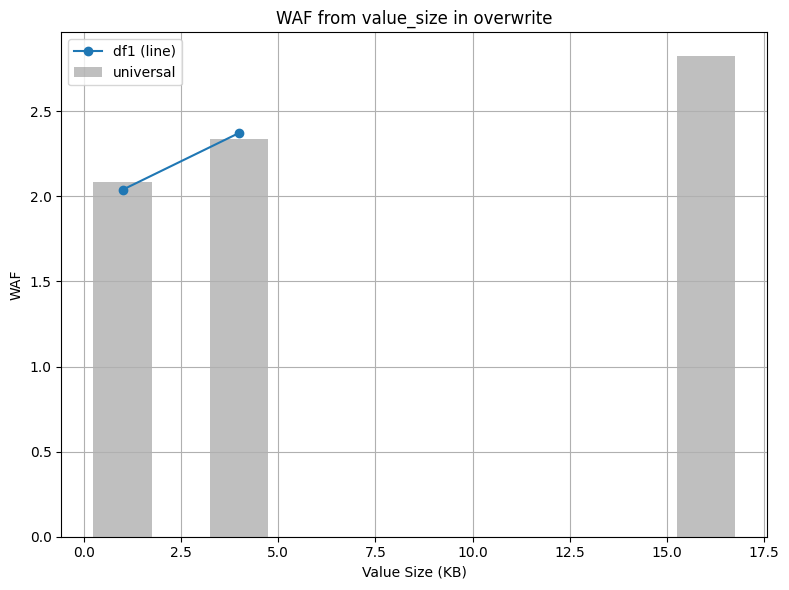

In [122]:
plot_graph(leveled_overwrite, universal_overwrite, col=None, workload='overwrite', compare="universal")

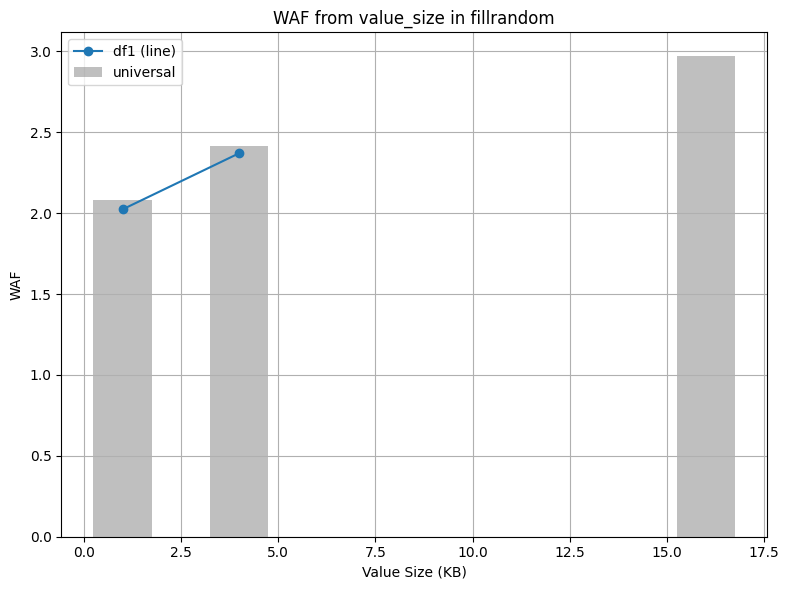

In [123]:
plot_graph(leveled_fillrandom, universal_fillrandom, col=None, workload='fillrandom', compare="universal")

## Level_base_log_data

In [91]:
import pandas as pd
# CSV 파일 읽기
base = pd.read_csv('modified_h1_base_output.csv')
base

,workload,compaction_style,value_size,max_bytes_for_level_base,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
0,overwrite,leveled,4KB,64MB,1000000,4128000000,3624640394,2264460227,4128000000,1000000,2.426623
1,overwrite,leveled,4KB,256MB,1000000,4128000000,3926898292,2301346485,4128000000,1000000,2.508780
2,fillrandom,leveled,16KB,512MB,1000000,16417000000,36052092660,8996302229,16417000000,1000000,3.744009
3,overwrite,leveled,4KB,512MB,1000000,4128000000,4394162603,2301497226,4128000000,1000000,2.622011
4,overwrite,leveled,1KB,512MB,1000000,1056000000,578140401,554188512,1056000000,1000000,2.072281
5,fillrandom,leveled,4KB,256MB,1000000,4128000000,4003270522,2301632341,4128000000,1000000,2.527350
6,fillrandom,leveled,1KB,64MB,1000000,1056000000,657101850,554147546,1056000000,1000000,2.147016
7,fillrandom,leveled,1KB,512MB,1000000,1056000000,588671433,554175641,1056000000,1000000,2.082242
8,fillrandom,leveled,1KB,256MB,1000000,1056000000,612860902,554235912,1056000000,1000000,2.105205
9,fillrandom,leveled,16KB,64MB,1000000,16417000000,27054478941,8996874388,16417000000,1000000,3.195977


In [92]:
base_overwrite = base[base['workload'] == 'overwrite']

In [93]:
base_overwrite.sort_values(by=['max_bytes_for_level_base', 'value_size'])

,workload,compaction_style,value_size,max_bytes_for_level_base,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
17,overwrite,leveled,16KB,256MB,1000000,16417000000,28906731543,8996900767,16417000000,1000000,3.308804
15,overwrite,leveled,1KB,256MB,1000000,1056000000,586670980,554101456,1056000000,1000000,2.080277
1,overwrite,leveled,4KB,256MB,1000000,4128000000,3926898292,2301346485,4128000000,1000000,2.508780
11,overwrite,leveled,16KB,512MB,1000000,16417000000,35711830951,8997355246,16417000000,1000000,3.723347
4,overwrite,leveled,1KB,512MB,1000000,1056000000,578140401,554188512,1056000000,1000000,2.072281
3,overwrite,leveled,4KB,512MB,1000000,4128000000,4394162603,2301497226,4128000000,1000000,2.622011
14,overwrite,leveled,16KB,64MB,1000000,16417000000,28758806652,9033100267,16417000000,1000000,3.301998
12,overwrite,leveled,1KB,64MB,1000000,1056000000,616212692,554147906,1056000000,1000000,2.108296
0,overwrite,leveled,4KB,64MB,1000000,4128000000,3624640394,2264460227,4128000000,1000000,2.426623


In [11]:
base_fillrandom = base[base['workload'] == 'fillrandom']
base_fillrandom

,workload,compaction_style,value_size,max_bytes_for_level_base,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
2,fillrandom,leveled,16KB,512MB,1000000,16417000000,36052092660,8996302229,16417000000,1000000,3.744009
5,fillrandom,leveled,4KB,256MB,1000000,4128000000,4003270522,2301632341,4128000000,1000000,2.527350
6,fillrandom,leveled,1KB,64MB,1000000,1056000000,657101850,554147546,1056000000,1000000,2.147016
7,fillrandom,leveled,1KB,512MB,1000000,1056000000,588671433,554175641,1056000000,1000000,2.082242
8,fillrandom,leveled,1KB,256MB,1000000,1056000000,612860902,554235912,1056000000,1000000,2.105205
9,fillrandom,leveled,16KB,64MB,1000000,16417000000,27054478941,8996874388,16417000000,1000000,3.195977
10,fillrandom,leveled,4KB,512MB,1000000,4128000000,4390431402,2301548443,4128000000,1000000,2.621119
13,fillrandom,leveled,16KB,256MB,1000000,16417000000,29512061896,8997147451,16417000000,1000000,3.345691
16,fillrandom,leveled,4KB,64MB,1000000,4128000000,3625923549,2264390085,4128000000,1000000,2.426917


### leveled

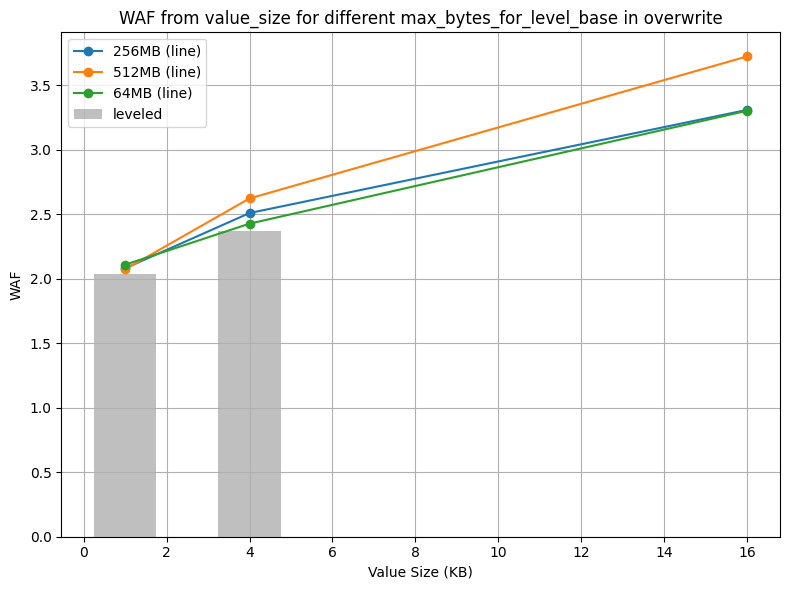

In [104]:
plot_graph(base_overwrite, leveled_overwrite, col="max_bytes_for_level_base", compare="leveled", workload="overwrite")

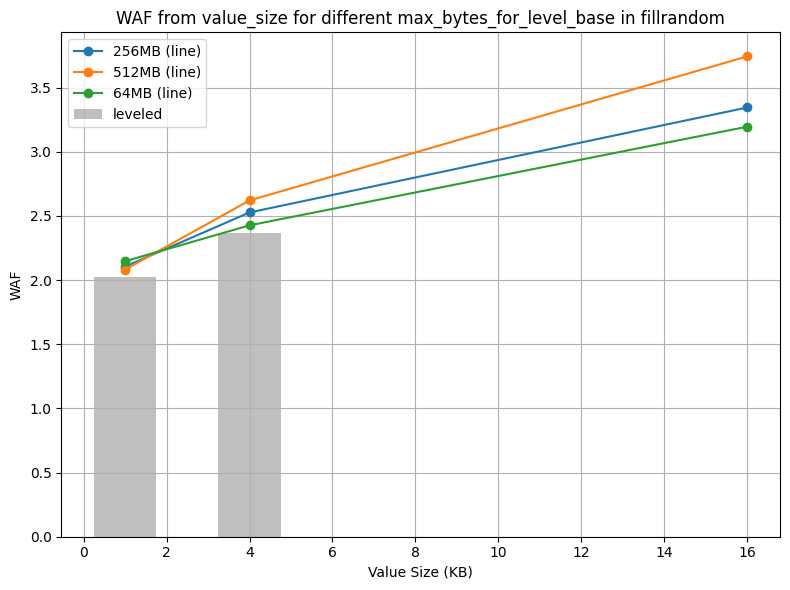

In [105]:
plot_graph(base_fillrandom, leveled_fillrandom, col="max_bytes_for_level_base", compare="leveled", workload="fillrandom")

### universal

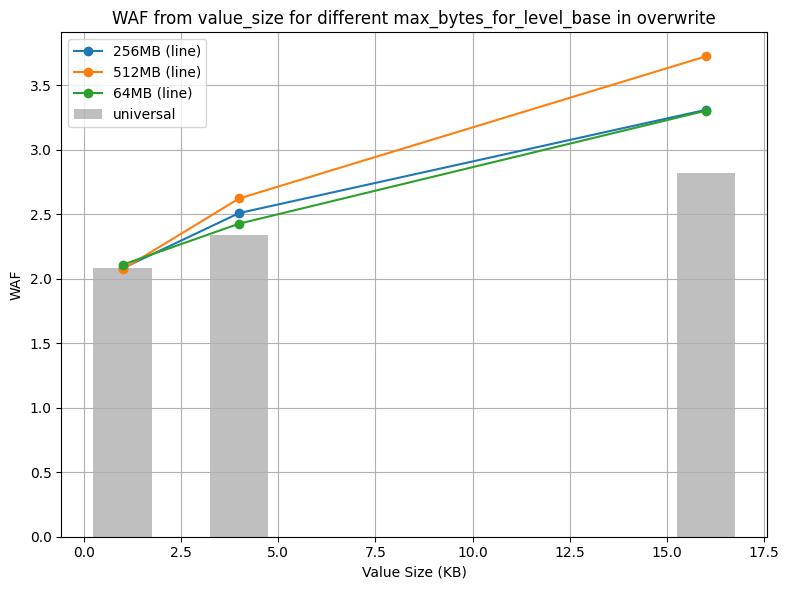

In [106]:
plot_graph(base_overwrite, universal_overwrite, col="max_bytes_for_level_base", workload="overwrite")

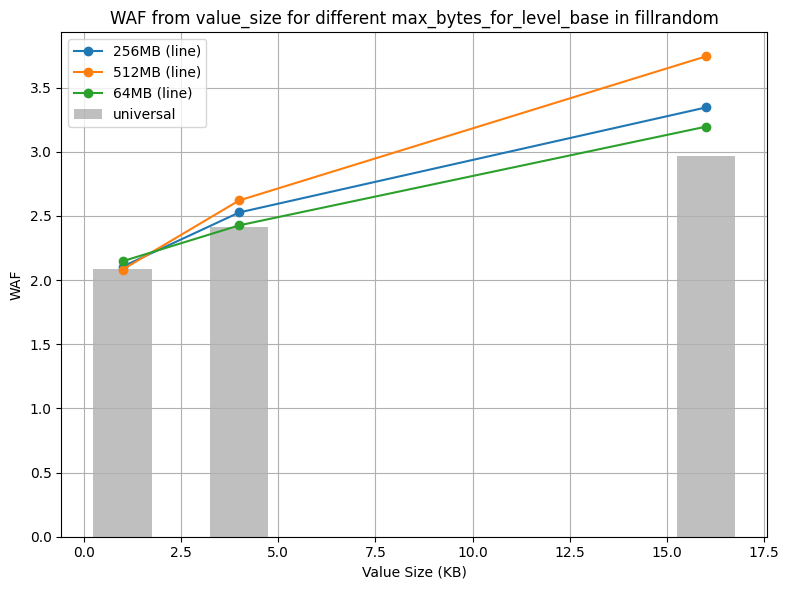

In [107]:
plot_graph(base_fillrandom, universal_fillrandom, col="max_bytes_for_level_base", workload="fillrandom")

## Level_multiplier_log_data

In [109]:
import pandas as pd
# CSV 파일 읽기
multiplier = pd.read_csv('modified_h1_multiplier_output.csv')
multiplier

,workload,compaction_style,value_size,max_bytes_for_level_multiplier,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
0,overwrite,leveled,4KB,20,1000000,4128000000,3876164853,2264551781,4128000000,1000000,2.487577
1,fillrandom,leveled,1KB,10,1000000,1056000000,532065061,554231834,1056000000,1000000,2.028690
2,fillrandom,leveled,16KB,10,1000000,16417000000,26808615703,8996537425,16417000000,1000000,3.180980
3,overwrite,leveled,16KB,20,1000000,16417000000,26975184186,8996918853,16417000000,1000000,3.191150
4,fillrandom,leveled,16KB,20,1000000,16417000000,28859522575,8996966203,16417000000,1000000,3.305932
5,fillrandom,leveled,16KB,4,1000000,16417000000,26312224465,8997182632,16417000000,1000000,3.150783
6,overwrite,leveled,16KB,10,1000000,16417000000,27856641055,8996908575,16417000000,1000000,3.244841
7,fillrandom,leveled,4KB,10,1000000,4128000000,3668790542,2264613878,4128000000,1000000,2.437356
8,overwrite,leveled,4KB,4,1000000,4128000000,3778744523,2301775935,4128000000,1000000,2.472994
9,overwrite,leveled,1KB,4,1000000,1056000000,581516485,554180812,1056000000,1000000,2.075471


In [110]:
multiplier_overwrite = multiplier[multiplier['workload'] == 'overwrite']
multiplier_overwrite

,workload,compaction_style,value_size,max_bytes_for_level_multiplier,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
0,overwrite,leveled,4KB,20,1000000,4128000000,3876164853,2264551781,4128000000,1000000,2.487577
3,overwrite,leveled,16KB,20,1000000,16417000000,26975184186,8996918853,16417000000,1000000,3.191150
6,overwrite,leveled,16KB,10,1000000,16417000000,27856641055,8996908575,16417000000,1000000,3.244841
8,overwrite,leveled,4KB,4,1000000,4128000000,3778744523,2301775935,4128000000,1000000,2.472994
9,overwrite,leveled,1KB,4,1000000,1056000000,581516485,554180812,1056000000,1000000,2.075471
10,overwrite,leveled,16KB,4,1000000,16417000000,26371740694,8996164758,16417000000,1000000,3.154346
12,overwrite,leveled,1KB,10,1000000,1056000000,581280026,554114156,1056000000,1000000,2.075184
15,overwrite,leveled,4KB,10,1000000,4128000000,3727609108,2301265466,4128000000,1000000,2.460483
16,overwrite,leveled,1KB,20,1000000,1056000000,584544657,554146613,1056000000,1000000,2.078306


In [111]:
multiplier_fillrandom = multiplier[multiplier['workload'] == 'fillrandom']
multiplier_fillrandom

,workload,compaction_style,value_size,max_bytes_for_level_multiplier,rocksdb.number.keys.written,rocksdb.bytes.written,rocksdb.compact.write.bytes,rocksdb.flush.write.bytes,rocksdb.wal.bytes,rocksdb.write.wal,WAF
1,fillrandom,leveled,1KB,10,1000000,1056000000,532065061,554231834,1056000000,1000000,2.028690
2,fillrandom,leveled,16KB,10,1000000,16417000000,26808615703,8996537425,16417000000,1000000,3.180980
4,fillrandom,leveled,16KB,20,1000000,16417000000,28859522575,8996966203,16417000000,1000000,3.305932
5,fillrandom,leveled,16KB,4,1000000,16417000000,26312224465,8997182632,16417000000,1000000,3.150783
7,fillrandom,leveled,4KB,10,1000000,4128000000,3668790542,2264613878,4128000000,1000000,2.437356
11,fillrandom,leveled,1KB,20,1000000,1056000000,573779355,554231337,1056000000,1000000,2.068192
13,fillrandom,leveled,4KB,4,1000000,4128000000,3961650233,2263893245,4128000000,1000000,2.508126
14,fillrandom,leveled,4KB,20,1000000,4128000000,3812224142,2264247445,4128000000,1000000,2.472013
17,fillrandom,leveled,1KB,4,1000000,1056000000,518053266,554174033,1056000000,1000000,2.015367


### Leveled

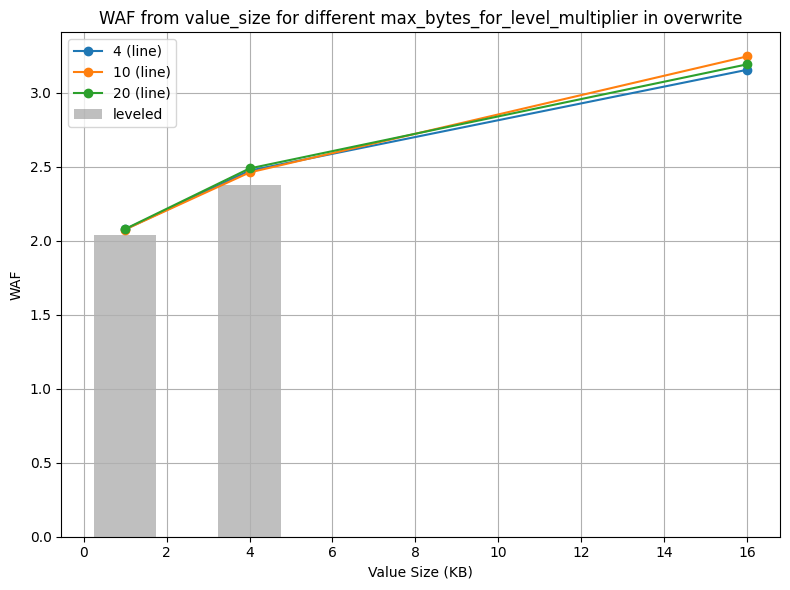

In [113]:
plot_graph(multiplier_overwrite, leveled_overwrite, col="max_bytes_for_level_multiplier", compare="leveled", workload="overwrite")

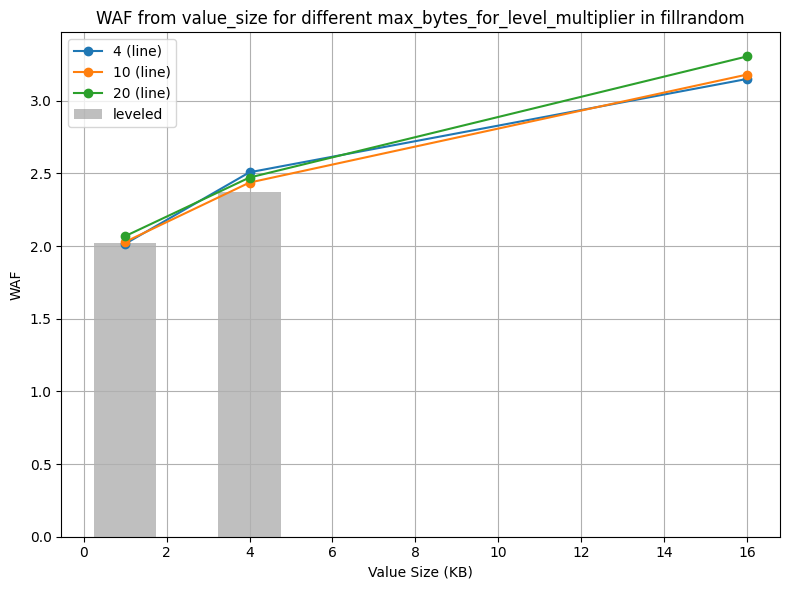

In [114]:
plot_graph(multiplier_fillrandom, leveled_fillrandom, col="max_bytes_for_level_multiplier", compare="leveled", workload="fillrandom")

### Universal

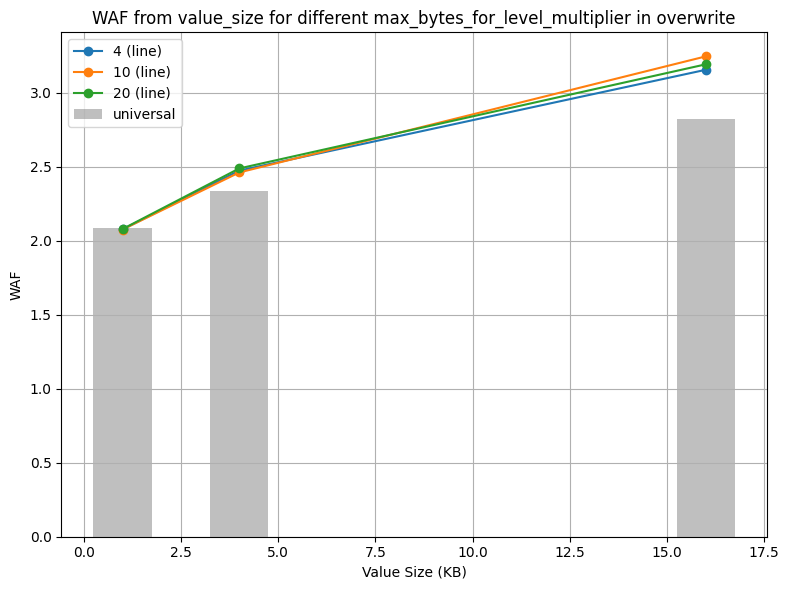

In [81]:
plot_graph(multiplier_overwrite, universal_overwrite, col="max_bytes_for_level_multiplier", workload="overwrite")

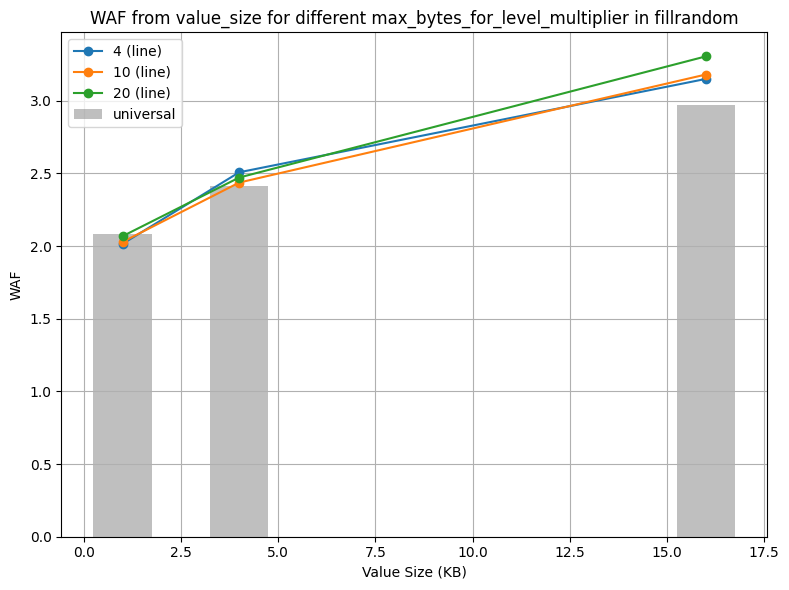

In [83]:
plot_graph(multiplier_fillrandom, universal_fillrandom, col="max_bytes_for_level_multiplier", workload="fillrandom")